#**Imports**

In [89]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt

#**Downloading dataset from Kaggle to Google Drive**

In [5]:
# mounting Google Drive with your credentials 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [106]:
# folder, created in advance in the Google Drive and containing kaggle.json
project_folder = "/content/gdrive/My Drive/Kaggle/NaturalPainters"
os.environ['KAGGLE_CONFIG_DIR'] = project_folder

In [110]:
# dive into folder
%cd /content/gdrive/My Drive/Kaggle/NaturalPainters

/content/gdrive/My Drive/Kaggle/NaturalPainters


In [19]:
# download dataset from the given Kaggle page to the current folder
!kaggle datasets download -d reiinakano/mypaint_brushstrokes

100% 29.8G/29.9G [10:15<00:00, 120MB/s]
100% 29.9G/29.9G [10:15<00:00, 52.1MB/s]


In [ ]:
# data is currently dowloaded as a zip-folder, we need to unzip it
!unzip \*.zip  && rm *.zip

#**Show Dataset**

In [82]:
# data is stored in the 'episodes_i.npz' format, where i is in {0,...,77}
# this routine loads desired 'episodes_i.npz' for a particular i
# data will be loaded in the dictionary with two fields: 'strokes' and 'actions'
def load_data(npz):

    data = np.load('strokes-dataset/' + npz)
    return data['strokes'], data['actions']

In [86]:
# example 'episodes_i.npz' for i = 0, takes 196.3MB
current_npz = 'episodes_0.npz'

strokes, actions = load_data(current_npz)
print(f"Strokes are {strokes.shape[0]} images with img_width = {strokes.shape[1]}, img_height = {strokes.shape[2]} and n_channels = {strokes.shape[3]}")
print(f"Actions are {actions.shape[0]} arrays of dimension {actions.shape[1]}")

Strokes are 100000 images with img_width = 64, img_height = 64 and n_channels = 3 
Actions are 100000 arrays of dimension 12


In [100]:
# printing routine for images in 'strokes' and corresponding numerical arrays in 'actions'
def print_data(strokes, actions, 
               figsize = [12, 5], nrows = 2, ncols = 6,
               savepath = None):

    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)

    for i, ax in enumerate(axes.flat):
        img = strokes[i]
        ax.imshow(img)
        ax.set_title("Stroke " + str(i + 1))

    plt.tight_layout(True)

    if(savepath):
      plt.savefig(savepath, dpi = 200)
      print(f"Images were saved in {savepath}.")

    print(f"Example of {nrows*ncols} strokes:\n")
    plt.show()

    print(f"Example of {nrows*ncols} actions:\n")
    print(actions[:nrows*ncols])

Images were saved in /content/gdrive/My Drive/Kaggle/NaturalPainters/example_imgs.
Example of 12 strokes:



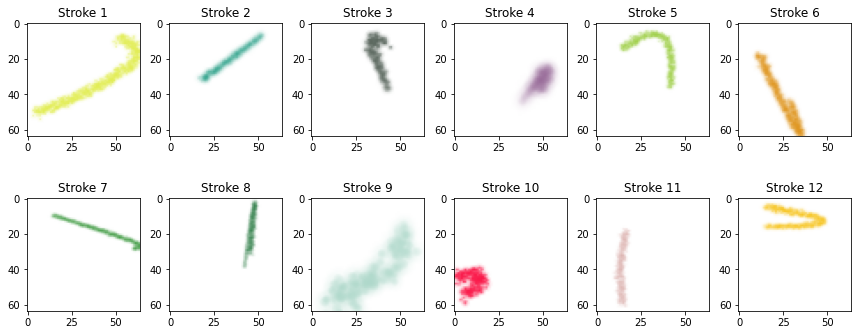

Example of 12 actions:

[[0.70163    0.30780981 0.90567365 0.38213227 0.07198964 0.79562617
  0.88507873 0.92951714 0.32732502 0.80123154 0.13205111 0.79151212]
 [0.28639486 0.56508359 0.50993573 0.34304069 0.2886826  0.50441372
  0.03936243 0.57090393 0.46340333 0.82727722 0.1055796  0.17021553]
 [0.88205569 0.46946314 0.53301533 0.1744133  0.63964843 0.1976555
  0.3437242  0.39513729 0.3583289  0.69395517 0.60213513 0.24681421]
 [0.36159412 0.89370938 0.82894509 0.40855139 0.7319879  0.59900976
  0.55833495 0.36477239 0.56094825 0.59129608 0.71241595 0.04987605]
 [0.65399557 0.22379337 0.58949139 0.12397647 0.23142408 0.23223371
  0.6247135  0.81208523 0.28465284 0.65979418 0.56580114 0.52732833]
 [0.28721921 0.43698698 0.53592925 0.97126169 0.45909005 0.68620817
  0.86853743 0.5660906  0.08024111 0.18483239 0.27675119 0.46259634]
 [0.44100901 0.12495457 0.92085427 0.38066556 0.94224411 0.44120989
  0.13659139 0.54942113 0.14851843 0.22446028 0.15235441 0.34858014]
 [0.21440344 0.034

In [111]:
# print first n_elem data samples
n_elem = 12
print_data(strokes[:n_elem], actions[:n_elem], savepath = project_folder + "/example_imgs")